<a href="https://colab.research.google.com/github/kuruvajayanth12/Neural-Networks-and-Deep-Learning/blob/main/Species_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install tensorflow matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128038 (\N{BIRD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


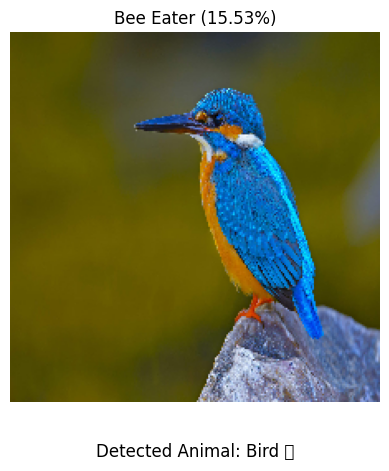

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# -------------------------
# SETTINGS
# -------------------------
IMG_SIZE = (224, 224)

# -------------------------
# LOAD PRETRAINED MODEL
# -------------------------
model = tf.keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=True
)

# -------------------------
# PREDICT + SHOW IMAGE
# -------------------------
def predict_and_show(img_path):
    # Load image for display
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_display = image.img_to_array(img).astype("uint8")

    # Prepare image for prediction
    img_pred = image.img_to_array(img)
    img_pred = np.expand_dims(img_pred, axis=0)
    img_pred = tf.keras.applications.mobilenet_v2.preprocess_input(img_pred)

    # Predict
    preds = model.predict(img_pred, verbose=0)
    decoded = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=5)[0]

    # Best label (breed/species)
    label = decoded[0][1].replace("_", " ").title()
    confidence = decoded[0][2] * 100

    # Decide animal type from TOP-5 predictions (ROBUST)
    animal = "Other"
    for _, name, _ in decoded:
        lname = name.lower()
        if any(x in lname for x in [
            "dog", "hound", "retriever", "shepherd", "terrier",
            "poodle", "bulldog", "mastiff", "chihuahua", "spaniel"
        ]):
            animal = "Dog 🐶"
            break
        elif any(x in lname for x in [
            "cat", "kitten", "tabby", "persian", "siamese", "egyptian"
        ]):
            animal = "Cat 🐱"
            break
        elif any(x in lname for x in [
            "bird", "sparrow", "parrot", "macaw", "eagle",
            "hawk", "owl", "peacock", "flamingo"
        ]):
            animal = "Bird 🐦"
            break

    # Display
    plt.imshow(img_display)
    plt.axis("off")
    plt.title(f"{label} ({confidence:.2f}%)")
    plt.text(
        0.5, -0.15,
        f"Detected Animal: {animal}",
        fontsize=12,
        ha="center",
        transform=plt.gca().transAxes
    )
    plt.show()


# -------------------------
# TEST
# -------------------------
predict_and_show("king.jpg")   # make sure file exists

